# Reproducibility 3: figure 4 & 6
-  Application harry's data: 
Kemble, Harry, et al. "Flux, toxicity, and expression costs generate complex genetic interactions in a metabolic pathway." Science Advances 6.23 (2020): eabb2236.
- Prediction on fitness & epistasis 

## Import packages

In [ ]:
import sys 
sys.path.append('../')
from dlim.model import DLIM 
from dlim.dataset import Data_model
from dlim.api import DLIM_API
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import r2_score
from numpy import mean
from numpy.random import choice
import pandas as pd
from tqdm import tqdm  
import matplotlib.pyplot as plt 
import numpy as np 

## Prediction accuracy on epistasis data 

In [2]:
df_data = pd.read_csv("../data/data_epis_1.csv", sep = ',', header = None)
data = Data_model(data=df_data, n_variables=2)

all_scores = []
pval_l = []
for i in tqdm(range(10)):
    train_id = choice(range(data.data.shape[0]), int(data.data.shape[0]*0.7), replace=False)
    val_id = [i for i in range(data.data.shape[0]) if i not in train_id]
    train_data = data.subset(train_id)
    val_data = data.subset(val_id)
    model = DLIM(n_variables = train_data.nb_val, hid_dim = 32, nb_layer = 1)
    dlim_regressor = DLIM_API(model=model, flag_spectral=True)
    losses = dlim_regressor.fit(train_data, lr = 1e-3, nb_epoch=400, batch_size=32, emb_regularization=1e-2)

    fit_v, var, _  = dlim_regressor.predict(val_data.data[:,:-1], detach=True) 
    score, pval = pearsonr(fit_v.flatten(), val_data.data[:, [-1]].flatten())
    all_scores += [score]
    pval_l += [pval]
print(mean(all_scores), all(p < 10**-5 for p in pval_l))

  0%|          | 0/10 [00:00<?, ?it/s]

spectral gap = 0.8982816934585571
spectral gap = 0.6345288157463074


 10%|█         | 1/10 [00:12<01:53, 12.60s/it]

spectral gap = 0.8902804255485535
spectral gap = 0.5275976061820984


 20%|██        | 2/10 [00:26<01:46, 13.28s/it]

spectral gap = 0.8904345035552979
spectral gap = 0.6671791672706604


 30%|███       | 3/10 [00:39<01:31, 13.03s/it]

spectral gap = 0.8854430317878723
spectral gap = 0.6348490715026855


 40%|████      | 4/10 [00:52<01:20, 13.34s/it]

spectral gap = 0.9276520609855652
spectral gap = 0.5849358439445496


 50%|█████     | 5/10 [01:05<01:05, 13.03s/it]

spectral gap = 0.8631076812744141
spectral gap = 0.6439145803451538


 60%|██████    | 6/10 [01:16<00:49, 12.43s/it]

spectral gap = 0.8891738653182983
spectral gap = 0.6956270933151245


 70%|███████   | 7/10 [01:27<00:35, 11.95s/it]

spectral gap = 0.9188525080680847
spectral gap = 0.6589908599853516


 80%|████████  | 8/10 [01:39<00:23, 11.84s/it]

spectral gap = 0.908042311668396
spectral gap = 0.6819922924041748


 90%|█████████ | 9/10 [01:50<00:11, 11.67s/it]

spectral gap = 0.9190361499786377
spectral gap = 0.6197976469993591


100%|██████████| 10/10 [02:03<00:00, 12.36s/it]

0.9765976207764968 True


## Get full prediction accuracy on en1

spectral gap = 0.9191145896911621
spectral gap = 0.6179166436195374
Model saved to ./pretrain_models/model_env_1.pth
0.9897068406420932
PearsonRResult(statistic=-0.13562524132921353, pvalue=5.962989899174471e-07)


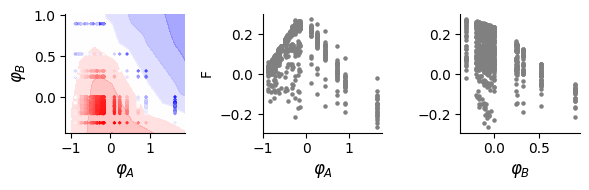

In [ ]:
# Prepare the data for DLIM model training and prediction
# df_data: loaded raw data from CSV file
# save_path: path to save the trained model

# Load raw data from CSV file (no header, comma-separated)
df_data = pd.read_csv("../data/data_env_1.csv", sep = ',', header = None)
save_path = "./pretrain_models/model_env_1.pth" 

# Create Data_model instance for DLIM

data = Data_model(data=df_data, n_variables=2)

# Initialize DLIM model with specified hyperparameters
model = DLIM(n_variables = data.nb_val, hid_dim = 32, nb_layer = 0, gap_thres=[0.01, 0.95])

# Create DLIM_API instance for training and prediction, using spectral initialization

dlim_regressor = DLIM_API(model=model, flag_spectral=True)

# Train the DLIM model on the data and save the trained model
losses = dlim_regressor.fit(data, lr = 1e-3, nb_epoch=400, batch_size=32, emb_regularization=1e-2, save_path=save_path)

# Predict fitness, variance, and latent variables for all data points
fit_a, var_a, lat_a = dlim_regressor.predict(data.data[:,:-1], detach=True) 

# Calculate R2 score for prediction accuracy
score = r2_score(fit_a.flatten(), data.data[:, [-1]].flatten())
print(score)

# Plot results: learned landscape and latent variable relationships
fig, (bx, cx, dx) = plt.subplots(1, 3, figsize=(6, 2))
dlim_regressor.plot(bx, data, xy_labels=['$\\varphi_A$', '$\\varphi_B$'])

# Remove top and right spines for cleaner plots
for xx in [bx, cx, dx]:
    for el in ["top", "right"]:
        xx.spines[el].set_visible(False)

# Plot the fitness and latent variable relationships
print(pearsonr(lat_a[:, 0], data[:, -1]))
cx.scatter(lat_a[:, 0], data[:, -1], s=5, c="grey")
dx.scatter(lat_a[:, 1], data[:, -1], s=5, c="grey")
cx.set_ylabel("F")
cx.set_xlabel("$\\varphi_A$", fontsize = 12)
dx.set_xlabel("$\\varphi_B$", fontsize = 12)
plt.tight_layout()
plt.tight_layout()
plt.savefig("./img/spec_harry_env_1.png", dpi=300, transparent=False)
plt.show()

## Get full prediction on env2


spectral gap = 0.8362952470779419
spectral gap = 0.996818482875824, so we initialize phenotypes randomly
Model saved to ./pretrain_models/model_env_2.pth
0.9785792323914563
PearsonRResult(statistic=0.053557032187381386, pvalue=0.047647709836146794)


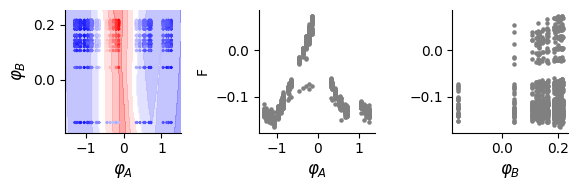

In [ ]:
# Load raw data from Env2 
df_data = pd.read_csv("../data/data_env_2.csv", sep = ',', header = None)
save_path = "./pretrain_models/model_env_2.pth" 

# Create Data_model instance for DLIM
data = Data_model(data=df_data, n_variables=2)

# Initialize DLIM model with specified hyperparameters
model = DLIM(n_variables = data.nb_val, hid_dim = 32, nb_layer = 0, gap_thres=[0.01, 0.95])

# Create DLIM_API instance for training and prediction, using spectral initialization
dlim_regressor = DLIM_API(model=model, flag_spectral=True)

# Train the DLIM model on the data and save the trained model
losses = dlim_regressor.fit(data, lr = 1e-3, nb_epoch=400, batch_size=32, emb_regularization=1e-2, save_path=save_path)

# Predict fitness, variance, and latent variables for all data points
fit_a, var_a, lat_a = dlim_regressor.predict(data.data[:,:-1], detach=True) 

# Calculate R2 score for prediction accuracy
score = r2_score(fit_a.flatten(), data.data[:, [-1]].flatten())
print(score)

# Plot results: learned landscape and latent variable relationships
fig, (bx, cx, dx) = plt.subplots(1, 3, figsize=(6, 2))
dlim_regressor.plot(bx, data, xy_labels=['$\\varphi_A$', '$\\varphi_B$'])

# Remove top and right spines for cleaner plots
for xx in [bx, cx, dx]:
    for el in ["top", "right"]:
        xx.spines[el].set_visible(False)

print(pearsonr(lat_a[:, 0], data[:, -1]))
cx.scatter(lat_a[:, 0], data[:, -1], s=5, c="grey")
dx.scatter(lat_a[:, 1], data[:, -1], s=5, c="grey")
cx.set_ylabel("F")
cx.set_xlabel("$\\varphi_A$", fontsize = 12)
dx.set_xlabel("$\\varphi_B$", fontsize = 12)
plt.tight_layout()
plt.savefig("./img/spec_harry_env_2.png", dpi=300, transparent=True)
plt.show()

## Get full prediction accuracy on epistasis

spectral gap = 0.8422809839248657
spectral gap = 0.5362866520881653
Model saved to ./pretrain_models/model_epis_1.pth
0.9690388229620961
PearsonRResult(statistic=-0.08049146764141356, pvalue=0.0048535939435478135)


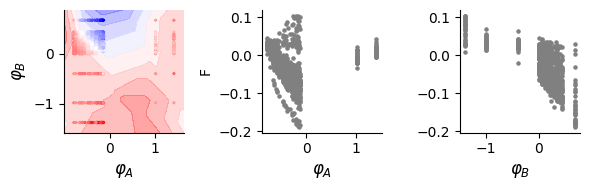

In [ ]:
# Load raw data from CSV file for epistasis in env1
df_data = pd.read_csv("../data/data_epis_1.csv", sep = ',', header = None)
data = Data_model(data=df_data, n_variables=2)
save_path = "./pretrain_models/model_epis_1.pth" 

# Create Data_model instance for DLIM
data = Data_model(data=df_data, n_variables=2)

# Initialize DLIM model with specified hyperparameters
model = DLIM(n_variables = data.nb_val, hid_dim = 32, nb_layer = 0, gap_thres=[0.01, 0.95])

# Create DLIM_API instance for training and prediction, using spectral initialization
dlim_regressor = DLIM_API(model=model, flag_spectral=True)

# Train the DLIM model on the data and save the trained model
losses = dlim_regressor.fit(data, lr = 1e-3, nb_epoch=400, batch_size=32, emb_regularization=1e-2, save_path=save_path)

# Predict fitness, variance, and latent variables for all data points
fit_a, var_a, lat_a = dlim_regressor.predict(data.data[:,:-1], detach=True) 

# Calculate R2 score for prediction accuracy

score = r2_score(fit_a.flatten(), data.data[:, [-1]].flatten())
print(score)


# Plot results: learned landscape and latent variable relationships
fig, (bx, cx, dx) = plt.subplots(1, 3, figsize=(6, 2))
dlim_regressor.plot(bx, data, xy_labels=['$\\varphi_A$', '$\\varphi_B$'])

# Remove top and right spines for cleaner plots

for xx in [bx, cx, dx]:
    for el in ["top", "right"]:
        xx.spines[el].set_visible(False)

# Plot the fitness and latent variable relationships
print(pearsonr(lat_a[:, 0], data[:, -1]))
cx.scatter(lat_a[:, 0], data[:, -1], s=5, c="grey")
dx.scatter(lat_a[:, 1], data[:, -1], s=5, c="grey")
cx.set_ylabel("F")
cx.set_xlabel("$\\varphi_A$", fontsize = 12)
dx.set_xlabel("$\\varphi_B$", fontsize = 12)
plt.tight_layout()
plt.tight_layout()
plt.savefig("./img/spec_harry_epis_1.png", dpi=300, transparent=True)
plt.show()

## Compare dlim model to mechanistic model 

In [10]:
import torch 
df_data = pd.read_csv("../data/data_env_1.csv", sep = ',', header = None)
data_harry = Data_model(data=df_data, n_variables=2)
act_mut = pd.read_csv("../data/activity_mutation.csv", header=None)
act_dict = {"araA": {}, "araB": {}}
for i, el in act_mut.iterrows():
    gene, mut, act = el
    act_dict[gene][mut] = act
all_mut = [n for n in data_harry.substitutions_tokens[0].keys() if n != "WT"]
araa_m = [act_dict["araA"][n] for n in all_mut]
arab_m = [act_dict["araB"][n] for n in all_mut]

# load model 
model = DLIM(n_variables = data_harry.nb_val, hid_dim = 32, nb_layer = 0)
dlim_regressor = DLIM_API(model=model, flag_spectral=True, load_model='./pretrain_models/model_env_1.pth')



### Get simulated data

In [11]:
from src_simulate_data.sim_data import Simulated
# type_f = "tgaus"
type_f = "bio" 
nb_var = 30
data_sim = Simulated(nb_var, type_f, comp=False)
data_bio = Data_model(data=pd.DataFrame(data_sim.data), n_variables=2)
model_save_path = 'pretrain/simulate_' + str(type_f) + '_model.pt'

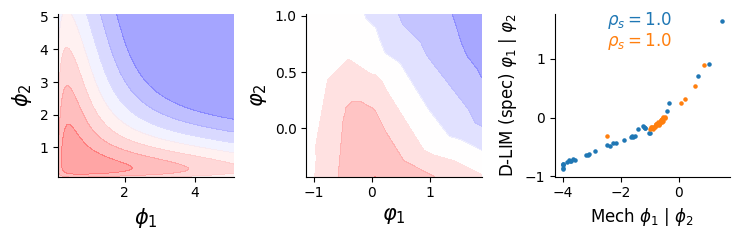

In [21]:
fig, (ax, bx, cx) = plt.subplots(1, 3, figsize=(2.5*3, 2.5))
data_sim.plot(ax, fontsize=15)
dlim_regressor.plot(bx, fontsize=15, xy_labels= ['$\\varphi_1$', '$\\varphi_2$'])
araa_d = [dlim_regressor.model.genes_emb[0][data_harry.substitutions_tokens[0][n]].detach().numpy() for n in all_mut]
arab_d = [dlim_regressor.model.genes_emb[1][data_harry.substitutions_tokens[1][n]].detach().numpy() for n in all_mut]

score_A = spearmanr(araa_m, araa_d)[0]
score_B = spearmanr(arab_m, arab_d)[0]
cx.set_xlabel("Mech $\\phi_1$ | $\\phi_2$", fontsize=12)
cx.set_ylabel("D-LIM (spec) $\\varphi_1$ | $\\varphi_2$", fontsize=12)
cx.annotate(f"$\\rho_s={abs(score_A):.1f}$", xy=(0.3, 0.93), xycoords="axes fraction", fontsize=12, c="C0")
cx.annotate(f"$\\rho_s={abs(score_B):.1f}$", xy=(0.3, 0.8), xycoords="axes fraction", fontsize=12, c="C1")
cx.scatter(np.sign(score_A)*np.array(araa_m), araa_d, c="C0", s=5)
cx.scatter(np.sign(score_B)*np.array(arab_m), arab_d, c="C1", s=5)
for axe in [ax, bx, cx]:
    for el in ["top", "right"]:
        axe.spines[el].set_visible(False)
plt.tight_layout()

plt.tight_layout()
plt.savefig("./img/fig_6.png", dpi=300, transparent=True)
plt.show()